# Metehan Gelgi

## Importing Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spa
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [2]:
# read data into memory
X = np.genfromtxt("hw07_data_set.csv", delimiter = ",")

# sample size
N = 300
# cluster count
K = 5

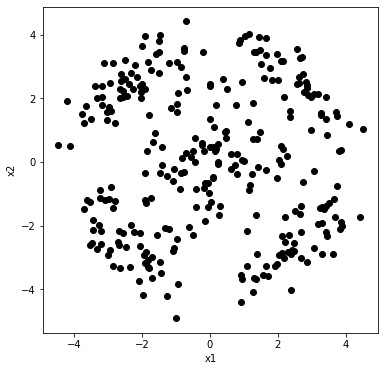

In [3]:
plt.figure(figsize = (6,6))
plt.scatter(X[:,0], X[:,1], c='black')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [4]:
# from lab code 
def update_centroids(memberships, X):
    if memberships is None:
        # initialize centroids
        centroids = X[np.random.choice(range(N), K),:]
    else:
        # update centroids
        centroids = np.vstack([np.mean(X[memberships == k,], axis = 0) for k in range(K)])
    return(centroids)

def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, X)
    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)
    return(memberships)

In [5]:
#initialize centroids,memberships
centroids = np.genfromtxt("hw07_initial_centroids.csv", delimiter = ",")
memberships = update_memberships(centroids, X)
print(centroids)

[[-3.0439416   0.32509753]
 [-0.30377397  3.73480678]
 [ 1.17587258 -2.50984601]
 [ 0.91037084  0.87608158]
 [-1.98588337  2.98466811]]


In [6]:
#initializing covariance matrices using centroids and memberships
covs = []
matrix_empt = [[0.0, 0.0], [0.0, 0.0]]
for k in range(K):
    for i in range(X[memberships == k].shape[0]):
        cov = np.matmul(((X[memberships == k])[i,:] - centroids[k,:])[:, None], ((X[memberships == k])[i,:] - centroids[k,:][None, :]))
        matrix_empt += cov
    covs.append(matrix_empt / X[memberships == k].shape[0])
    matrix_empt = [[0.0, 0.0], [0.0, 0.0]]

# prior probabilities using memberships
priors = [X[memberships == k].shape[0] / N for k in range(K)]

In [7]:
def update_means(h_ik, X):
    return(np.vstack([np.matmul(h_ik[k], X)/np.sum(h_ik[k], axis = 0) for k in range(K)]))
def update_covs(h_ik, means, X):
    covs = []
    empty_mat = [[0.0, 0.0], [0.0, 0.0]]
    for k in range(K):
        for i in range(N):
            cov = np.matmul((X[i] - means[k])[:, None], (X[i] - means[k])[None, :])*h_ik[k][i]
            empty_mat += cov
        covs.append(empty_mat / np.sum(h_ik[k], axis = 0))
        empty_mat = [[0.0, 0.0], [0.0, 0.0]]
    return(covs)
def update_priors(h_ik):
    return(np.vstack([np.sum(h_ik[k], axis = 0)/N for k in range(K)]))

In [8]:
#iteration for EM-algorithm
stepSize=100
for t in range(stepSize):
    #E-step
    post_probs = []
    for k in range(K):
        posterior = multivariate_normal(centroids[k], covs[k]).pdf(X)*priors[k]
        post_probs.append(posterior)
    h_ik = np.vstack([post_probs[k]/np.sum(post_probs, axis = 0) for k in range(K)])
    # M-Step
    centroids = update_means(h_ik, X)
    covs = update_covs(h_ik, centroids, X)
    priors = update_priors(h_ik)
    
#calculate the final h_ik values with centroids and priors 
post_probs = []
for k in range(K): 
    posterior = multivariate_normal(centroids[k], covs[k]).pdf(X)*priors[k]
    post_probs.append(posterior)
h_ik = np.vstack([post_probs[k]/np.sum(post_probs, axis = 0) for k in range(K)])

In [9]:
print('centroids')
print(centroids)

centroids
[[-2.44390052 -2.5453942 ]
 [ 2.50354332  2.51134859]
 [ 2.56726404 -2.55477253]
 [ 0.12794677  0.15595776]
 [-2.41465305  2.4855615 ]]


In [10]:
memberships=np.argmax(h_ik, axis = 0)
print(memberships)

[1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 4 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 4 3 3 3
 3 3 3 3]


In [11]:
# gaussian ellipse code is taken from github 
# https://github.com/joferkington/oost_paper_code/blob/master/error_ellipse.py
def plot_cov_ellipse(cov, pos, nstd, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.
    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.
    Returns
    -------
        A matplotlib ellipse artist
    """
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip

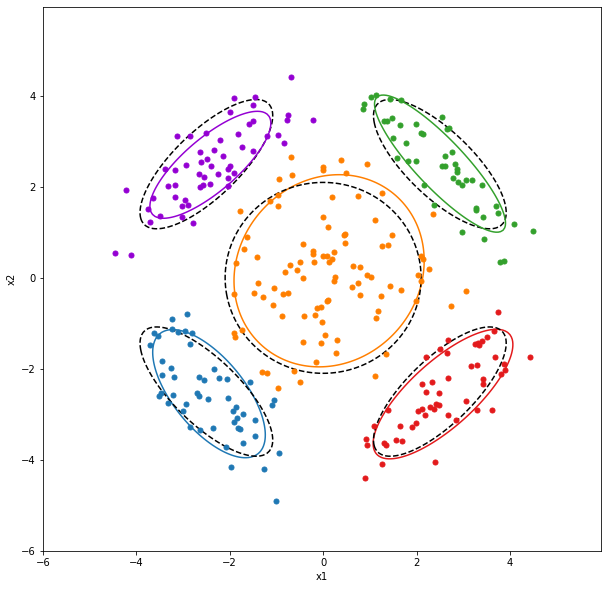

In [54]:
means = [[+2.5, +2.5],
         [-2.5, +2.5],
         [-2.5, -2.5],
         [+2.5, -2.5],
         [+0.0, +0.0]]
covariances = [[[+0.8, -0.6], [-0.6, +0.8]],
               [[+0.8, +0.6], [+0.6, +0.8]],
               [[+0.8, -0.6], [-0.6, +0.8]],
               [[+0.8, +0.6], [+0.6, +0.8]],
               [[+1.6, +0.0], [+0.0, +1.6]]]

x, y = np.mgrid[-6:+6:.05, -6:+6:.05]
pos = np.dstack((x, y))

cluster_colors = np.array(["#1f78b4","#33a02c","#e31a1c","#ff7f00","#9400d3"])
plt.figure(figsize = (10, 10))

for c in range(K):
    original_classes = multivariate_normal(means[c], np.array(covariances[c])*2).pdf(pos)
    found_classes= multivariate_normal(centroids[c], covs[c]*2).pdf(pos)
    plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10,
             color = cluster_colors[c])
    plt.contour(x, y, original_classes, levels=1, linestyles="dashed", colors="k")
    plt.contour(x, y, found_classes, levels=1, colors=cluster_colors[c])
    
    #plot_cov_ellipse(covariances[c], means[c], nstd =1.645, ax=None,facecolor = 'none',edgecolor='black',linestyle='--')
    #plot_cov_ellipse(covs[c], centroids[c], nstd =1.645,ax=None,facecolor = 'none',edgecolor=cluster_colors[c],linestyle='-') 
    
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [49]:
type(covs[1])

numpy.ndarray

In [50]:
type(covariances[1])

list